In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from statsmodels.formula.api import ols

In [3]:
%matplotlib inline

#### Наша квартира

Так как квартира дом был построен в 2003 году, предполагаем, что телефон там есть.

In [4]:
our_flat = {'lon': 37.604610,'lat': 55.866111, 'rooms': 1, 'totsp': 37.8, 'kitsp': 7.4, \
            'bal': 1, 'tel': 1, 'floor': 6/17, 'Metrdist': 5, 'Walk': 1}

#### Выборка

In [18]:
df = pd.read_csv('sell_result/sell_table_2.csv')

In [19]:
df = df.iloc[:, 1:]

In [20]:
df = df[df.index != 746]

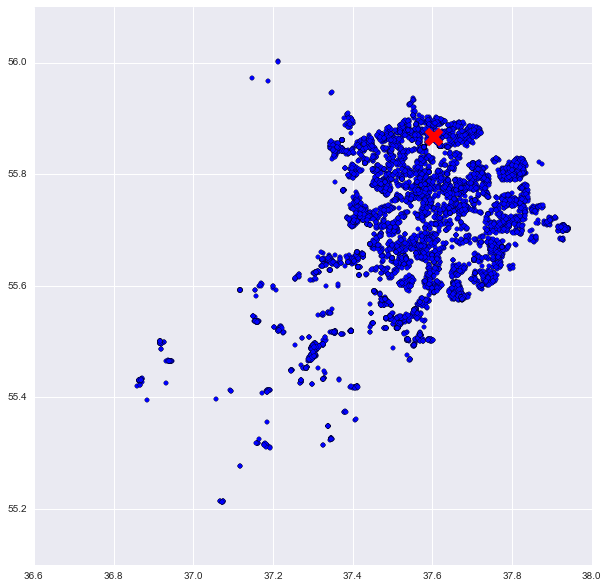

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(df['Lon'], df['Lat'])
plt.scatter(our_flat['lon'], our_flat['lat'], color='red', marker='x', s=20, linewidths=20)

In [22]:
df.head()

,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,Kitsp,...,Stname,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New,Link
0,55.536573,37.158982,10,NaN,2,6800000,6800000,73.2,14.4,40.2,...,Тропарево,15,0,NaN,0,1,3,4,0,http://www.cian.ru/sale/flat/148936137/
1,55.823156,37.500881,1,NaN,2,9600000,9600000,55.0,10.0,35.0,...,Войковская,5,1,NaN,0,0,3,6,0,http://www.cian.ru/sale/flat/2462671/
2,55.878750,37.538587,1,NaN,2,7529815,7529815,61.2,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,2,21,1,http://www.cian.ru/sale/flat/43992990/
3,55.739336,37.705275,4,Нижегородский,1,4150000,4150000,30.0,6.5,18.5,...,Авиамоторная,24,1,1,1,0,1,5,0,http://www.cian.ru/sale/flat/151019032/
4,55.670757,37.587712,6,Котловка,2,6000000,6000000,42.0,NaN,31.0,...,Профсоюзная,5,0,0,0,1,5,5,0,http://www.cian.ru/sale/flat/151011793/


### Соберем данные по похожим квартирам

Сначала поставим ограничение. В идеале нужно ставить ограничеие на район, но поскольку район может не указываться, то мы так же попробуем посмотрть на станции метро (их можно считать хорошим прокси для района).

In [23]:
l_small_districts = ['Отрадное', 'Митино', 'Чертаново Южное', 'Перово', 'Кузьминки', 'Текстильщики', 'Царицыно', 'Печатники', \
                     'Ивановское', 'Новогиреево', 'Ясенево', 'Измайлово', 'Восточное Измайлово', 'Головинский', \
                     'Северное Медведково', 'Южное Медведково', 'Бабушкинский', 'Ховрино', 'Левобережный', 'Южное Тушино', \
                     'Северное Тушино']

In [24]:
l_metro = ['Отрадное', 'Митино', 'Пятницкое шоссе', 'Волоколамская', 'Пражская', 'Улица Академика Янгеля', 'Перово', \
           'Кузьминки', 'Текстильщики', 'Кантемировская', 'Каширская', 'Царицыно', 'Печатники', 'Новогиреево', \
           'Ясенево', 'Новоясеневская', 'Измайловская', 'Первомайская', 'Водный стадион', 'Медведково', 'Бабушкинская', \
           'Речной вокзал', 'Планерная', 'Сходненская']

In [25]:
l = []
for d in l_small_districts:
    l.append((d, len(df[df['Small_district'] == d])))
s = 0
for i in l:
    print(i[0],': ',i[1])
    s = s + i[1]
print(s)

Отрадное :  68
Митино :  108
Чертаново Южное :  58
Перово :  58
Кузьминки :  69
Текстильщики :  19
Царицыно :  57
Печатники :  14
Ивановское :  57
Новогиреево :  51
Ясенево :  42
Измайлово :  50
Восточное Измайлово :  29
Головинский :  50
Северное Медведково :  41
Южное Медведково :  27
Бабушкинский :  31
Ховрино :  35
Левобережный :  35
Южное Тушино :  50
Северное Тушино :  59
1008


In [27]:
l = []
for m in l_metro:
    l.append((m, len(df[df['Stname'] == m])))
s = 0
for i in l:
    print(i[0],': ',i[1])
    s = s + i[1]
print(s)

Отрадное :  75
Митино :  93
Пятницкое шоссе :  90
Волоколамская :  25
Пражская :  60
Улица Академика Янгеля :  34
Перово :  59
Кузьминки :  71
Текстильщики :  22
Кантемировская :  26
Каширская :  4
Царицыно :  184
Печатники :  15
Новогиреево :  93
Ясенево :  45
Новоясеневская :  7
Измайловская :  33
Первомайская :  66
Водный стадион :  129
Медведково :  51
Бабушкинская :  115
Речной вокзал :  111
Планерная :  57
Сходненская :  87
1552


In [38]:
df_adj_dist = df.loc[df['Small_district'].isin(l_small_districts)].copy()

In [95]:
df_adj_metr = df.loc[df['Stname'].isin(l_metro)].copy()

---

### Работа с выборкой по району

Теперь возьмем выборку собранную по районам и будем сужать ее по метражу

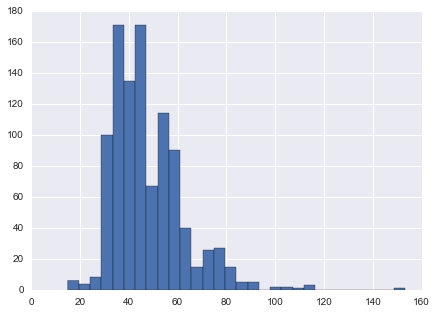

In [41]:
plt.figure(figsize=(7,5))
plt.hist(list(df_adj_dist['Totsp']), bins=30)
plt.show()

In [42]:
# Ограничение на метраж - список T and F
sp_adj_dist = ((df_adj_dist['Totsp'] <= 60) & (df_adj_dist['Totsp'] >= 30))

In [43]:
df_adj_dist = df_adj_dist[sp_adj_dist]

In [44]:
# Сразу подготовим датасет для построения регрессий
df_dist_reg = df_adj_dist[['Lat', 'Lon', 'Rooms', 'Price_duplicate', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk',\
            'Tel', 'Bal', 'Floor', 'Nfloors']].copy()

In [45]:
#for c in df_adj_dist.columns:
#    print(c, len(df_adj_dist[c][df_adj_dist[c].isnull()]))

### Посмотрим на нашу выборку

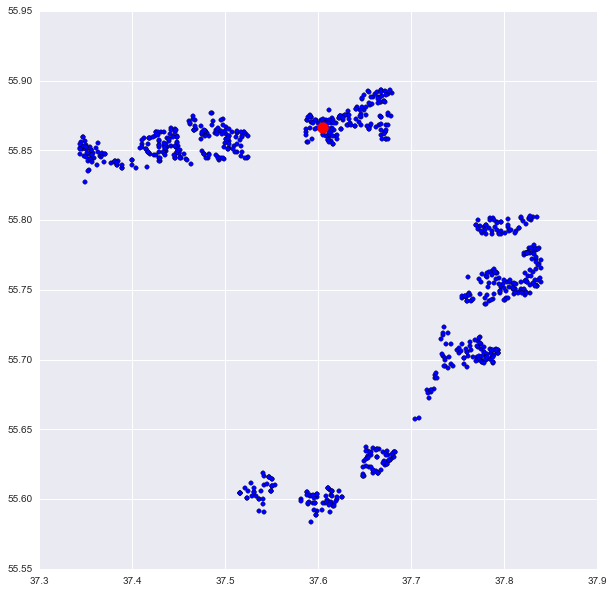

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(df_adj_dist['Lon'], df_adj_dist['Lat'])
plt.scatter(our_flat['lon'], our_flat['lat'], color='red', s=40, linewidths=5)

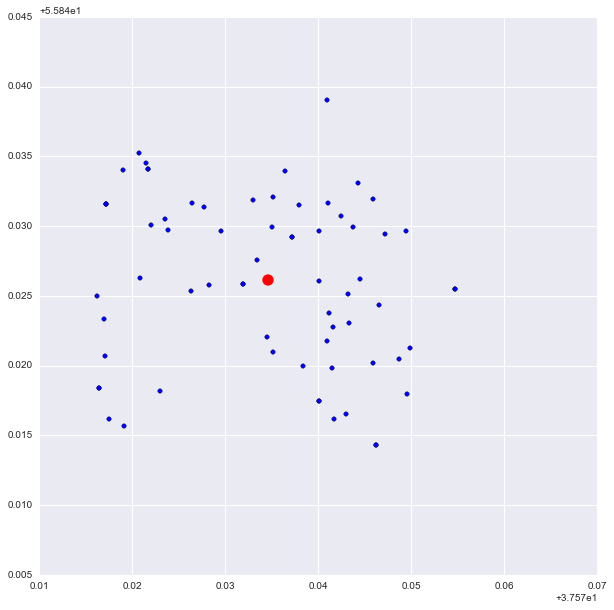

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(df[df['Small_district'] == 'Отрадное']['Lon'], df[df['Small_district'] == 'Отрадное']['Lat'])
plt.scatter(our_flat['lon'], our_flat['lat'], color='red', s=40, linewidths=5)

### Оценка по среднему

In [49]:
sp_similar_dist = ((df_adj_dist['Totsp'] <= 39) & (df_adj_dist['Totsp'] >= 36))
df_similar = df_adj_dist[sp_similar_dist]

In [50]:
df_similar = df_similar[df_similar['Rooms']==1]

In [51]:
sp_similar_metrdist = ((df_similar['Metrdist'] <= 7) & (df_similar['Metrdist'] >= 3))
df_similar = df_similar[sp_similar_metrdist]

In [52]:
df_similar = df_similar[df_similar['Bal']==1]

In [53]:
df_similar = df_similar[df_similar['Walk']==1]

In [54]:
np.mean(df_similar['Price_duplicate'])

6631884.615384615

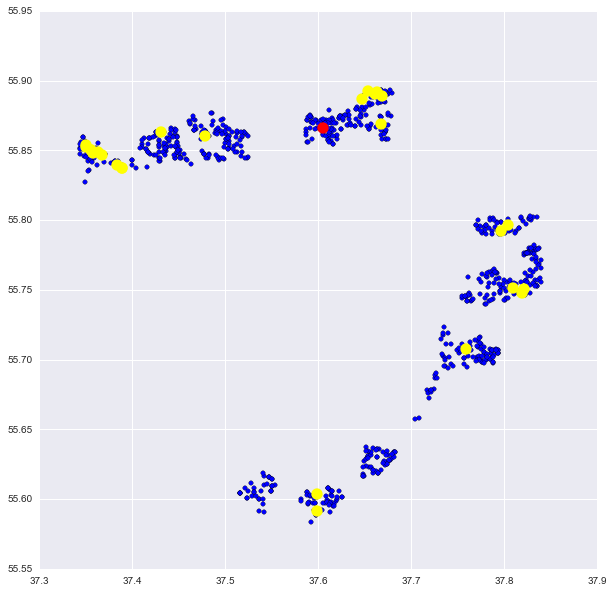

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(df_adj_dist['Lon'], df_adj_dist['Lat'])
plt.scatter(our_flat['lon'], our_flat['lat'], color='red',  s=40, linewidths=5)
plt.scatter(df_similar['Lon'], df_similar['Lat'], color='yellow',  s=40, linewidths=5)

In [84]:
df_otr = df[df['Small_district'] == 'Отрадное']

In [86]:
df_otr = df_otr[(df_otr['Totsp'] <= 39) & (df_otr['Totsp'] >= 36)]

In [87]:
df_otr

,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,Kitsp,...,Stname,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New,Link
1404,55.870046,37.591970,2,Отрадное,1,6550000,6550000,36.0,NaN,20.0,...,Отрадное,10,1,1,0,1,9,12,0,http://www.cian.ru/sale/flat/150854555/
1589,55.866283,37.590865,2,Отрадное,1,7000000,7000000,38.0,NaN,19.0,...,Отрадное,14,1,0,0,1,16,17,0,http://www.cian.ru/sale/flat/148253255/
1970,55.865879,37.601834,2,Отрадное,1,5600000,5600000,37.3,10.0,19.0,...,Отрадное,1,1,1,0,1,11,16,0,http://www.cian.ru/sale/flat/150291118/
3498,55.870688,37.612461,2,Отрадное,1,6700000,6700000,38.5,10.0,20.2,...,Отрадное,13,1,0,1,1,12,18,0,http://www.cian.ru/sale/flat/151252912/
3846,55.871945,37.615919,2,Отрадное,1,5845000,5845000,36.0,NaN,21.0,...,Отрадное,12,1,0,0,1,8,9,0,http://www.cian.ru/sale/flat/149937932/
4012,55.874067,37.591683,2,Отрадное,1,6800000,6800000,39.0,10.0,18.0,...,Отрадное,10,0,0,0,1,18,22,0,http://www.cian.ru/sale/flat/150996806/
5938,55.863343,37.586958,2,Отрадное,1,6100000,6100000,39.0,8.5,21.0,...,Отрадное,12,1,0,1,1,12,12,0,http://www.cian.ru/sale/flat/49171389/
6997,55.874016,37.588979,2,Отрадное,1,6550000,6550000,39.0,11.0,18.0,...,Отрадное,15,1,0,0,1,25,25,0,http://www.cian.ru/sale/flat/148148777/
7055,55.879046,37.610961,2,Отрадное,1,6600000,6600000,37.0,NaN,19.0,...,Бибирево,7,0,0,0,1,17,17,0,http://www.cian.ru/sale/flat/150984351/
8205,55.875213,37.590686,2,Отрадное,1,6580000,6580000,38.0,12.0,19.0,...,Отрадное,15,1,0,0,1,18,22,0,http://www.cian.ru/sale/flat/150386080/


### Построение регрессии

In [112]:
len(df_dist_reg)

839

In [113]:
df_dist_reg['Floor_index'] = df_dist_reg['Floor']/df_dist_reg['Nfloors']

In [114]:
df_dist_reg['Metrdist_Walk'] = df_dist_reg['Metrdist']*df_dist_reg['Walk']

In [115]:
len(df_dist_reg[['Rooms', 'Price_duplicate', 'Totsp', 'Kitsp', 'Metrdist', 'Walk',\
            'Tel', 'Bal', 'Floor_index']].dropna())

814

In [116]:
df_m = df_dist_reg[['Rooms', 'Price_duplicate', 'Totsp', 'Kitsp', 'Metrdist', 'Walk', 'Metrdist_Walk',\
            'Tel', 'Bal', 'Floor_index']].dropna()

model = ols('Price_duplicate ~ Rooms + Totsp + Kitsp + Metrdist_Walk + Metrdist + Bal', data = df_m).fit()

In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Price_duplicate   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     287.6
Date:                Wed, 30 Nov 2016   Prob (F-statistic):          1.47e-196
Time:                        23:52:30   Log-Likelihood:                -12288.
No. Observations:                 814   AIC:                         2.459e+04
Df Residuals:                     807   BIC:                         2.462e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept     -8.787e+04   1.96e+05     -0.449      0.654     -4.72e+05  2.97e+05
Rooms         -3.421e+05    1.1e+05     -3.103      0.002     -5.59e+05 -1.26e+05
Totsp          2.364e+05   7539.043     31.358      0.000      2.22e+05  2.51e+05
Kitsp         -1.069e+05   1.27e+04     -8.440      0.000     -1.32e+05  -8.2e+04
Metrdist_Walk  2.621e+04   8647.643      3.031      0.003      9234.520  4.32e+04
Metrdist      -4.624e+04   1.01e+04     -4.576      0.000     -6.61e+04 -2.64e+04
Bal            3.934e+05    7.6e+04      5.175      0.000      2.44e+05  5.43e+05
==============================================================================
Omnibus:                      146.786   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.055
Skew:                           0.899   Prob(JB):                     6.11e-92
Kurtosis:                       6.025   Cond. No.                         354.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model.params

Intercept        -87866.158529
Rooms           -342143.283122
Totsp            236406.124665
Kitsp           -106865.868134
Metrdist_Walk     26209.046648
Metrdist         -46238.811317
Bal              393393.949404
dtype: float64

In [335]:
# результат от регресии (прогноз по нашей квартире)
model.params[0]*1 + model.params[1]*37.8 + model.params[2]*7.4 + model.params[3]*5 + model.params[4]*5 + model.params[5]*1

8020807.5058687683

### Работа с выборкой по метро

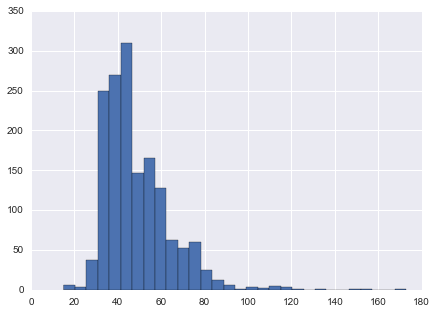

In [88]:
plt.figure(figsize=(7,5))
plt.hist(list(df_adj_metr['Totsp']), bins=30)
plt.show()

In [107]:
sp_adj_metr = ((df_adj_metr['Totsp'] <= 60) & (df_adj_metr['Totsp'] >= 30))
df_adj_metr = df_adj_metr[sp_adj_metr]
coord_adj_metr = ((df_adj_metr['Lon'] >= 37.3) & (df_adj_metr['Lat'] >= 55.55))
df_adj_metr = df_adj_metr[coord_adj_metr]
df_metr_reg = df_adj_metr[['Lat', 'Lon', 'Rooms', 'Price_duplicate', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk',\
            'Tel', 'Bal', 'Floor', 'Nfloors']].copy()

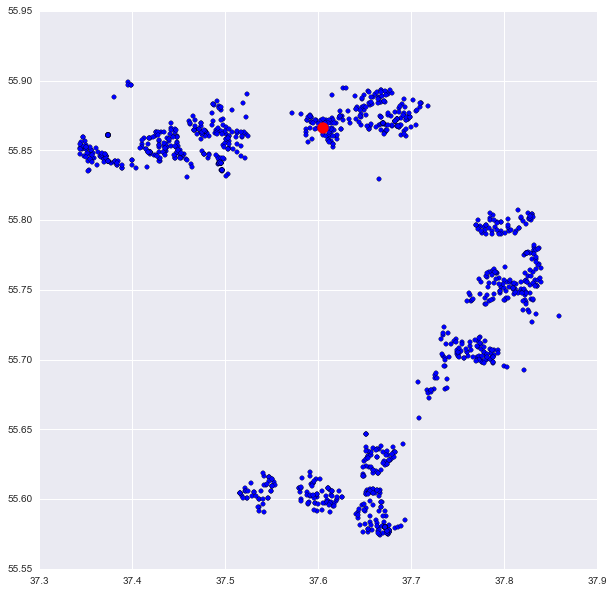

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(df_adj_metr['Lon'], df_adj_metr['Lat'])
plt.scatter(our_flat['lon'], our_flat['lat'], color='red', s=40, linewidths=5)